In [1]:
import networkx as nx
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
import h5py

Number of nodes: 28
Number of edges: 46


{(0, 21): Text(0.1, 0.8, '0'),
 (0, 1): Text(0.07500000000000001, 0.375, '1'),
 (0, 15): Text(0.125, 0.6499999999999999, '2'),
 (1, 15): Text(0.1, 0.325, '3'),
 (1, 9): Text(0.125, 0.175, '4'),
 (1, 2): Text(0.125, 0.1, '5'),
 (2, 3): Text(0.375, 0.1, '6'),
 (3, 7): Text(0.525, 0.125, '7'),
 (3, 4): Text(0.675, 0.05, '8'),
 (4, 5): Text(0.8500000000000001, 0.07500000000000001, '9'),
 (4, 6): Text(0.775, 0.1, '10'),
 (5, 6): Text(0.825, 0.125, '11'),
 (5, 25): Text(0.9, 0.25, '12'),
 (5, 26): Text(0.925, 0.07500000000000001, '13'),
 (6, 11): Text(0.7, 0.25, '14'),
 (7, 8): Text(0.4, 0.25, '15'),
 (8, 9): Text(0.25, 0.3, '16'),
 (8, 10): Text(0.3, 0.35, '17'),
 (8, 11): Text(0.475, 0.32499999999999996, '18'),
 (9, 15): Text(0.175, 0.44999999999999996, '19'),
 (9, 10): Text(0.25, 0.35, '20'),
 (10, 14): Text(0.35, 0.525, '21'),
 (10, 11): Text(0.475, 0.375, '22'),
 (11, 12): Text(0.7250000000000001, 0.425, '23'),
 (11, 25): Text(0.775, 0.375, '24'),
 (12, 18): Text(0.8, 0.65, '25'),
 (12,

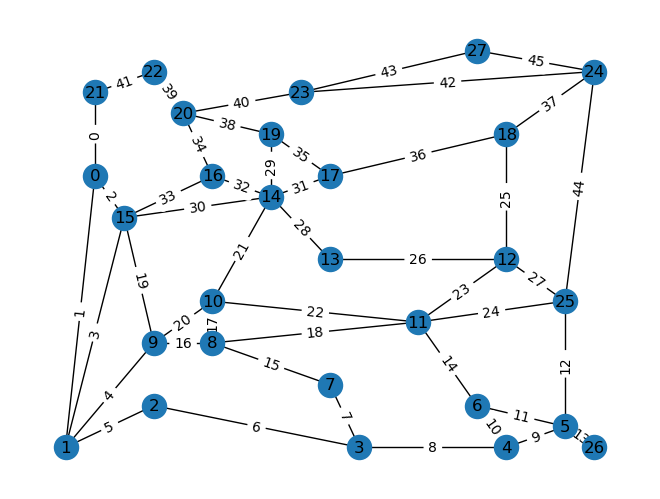

In [2]:
G = nx.Graph()

# Add nodes with custom coordinates
nodes = [(0, {'pos': (0.1, 0.7)}),
         (1, {'pos': (0.05, 0.05)}), 
         (2, {'pos': (0.2, 0.15)}), 
         (3, {'pos': (0.55, 0.05)}),
         (4, {'pos': (0.8, 0.05)}),
         (5, {'pos': (0.9, 0.1)}),
         (6, {'pos': (0.75, 0.15)}),
         (7, {'pos': (0.5, 0.2)}),
         (8, {'pos': (0.3, 0.3)}),
         (9, {'pos': (0.2, 0.3)}),
         (10, {'pos': (0.3, 0.4)}),
         (11, {'pos': (0.65, 0.35)}),
         (12, {'pos': (0.8, 0.5)}),
         (13, {'pos': (0.5, 0.5)}),
         (14, {'pos': (0.4, 0.65)}),
         (15, {'pos': (0.15, 0.6)}),
         (16, {'pos': (0.3, 0.7)}),
         (17, {'pos': (0.5, 0.7)}),
         (18, {'pos': (0.8, 0.8)}),
         (19, {'pos': (0.4, 0.8)}),
         (20, {'pos': (0.25, 0.85)}),
         (21, {'pos': (0.1, 0.9)}),
         (22, {'pos': (0.2, 0.95)}),
         (23, {'pos': (0.45, 0.9)}),
         (24, {'pos': (0.95, 0.95)}),
         (25, {'pos': (0.9, 0.4)}),
         (26, {'pos': (0.95, 0.05)}),
         (27, {'pos': (0.75, 1.0)}),]
G.add_nodes_from(nodes)

edges = [(0, 21), (0, 1), (0, 15), (21, 22), (22, 20), (20, 23), (23, 24), (24, 18), (19, 14), (14, 15), (15, 16), (16, 20), (19, 20), (19, 17), (14, 17), (14, 16), (17, 18), (12, 18), (12, 13), (13, 14), (10, 14), (1, 15), (9, 15), (1, 9), (1, 2), (11, 12), (9, 10), (3, 7), (2, 3), (7, 8), (8, 9), (8, 10), (10, 11), (8, 11), (6, 11), (3, 4), (4, 5), (4, 6), (5, 6), (24, 25), (12, 25), (5, 25), (11, 25), (5, 26), (23, 27), (24, 27)]
# Add an index to each edge in ascending order
indexed_edges = [((start, end), index) for index, (start, end) in enumerate(edges)]
edge_labels = {edge: idx for idx, edge in enumerate(edges)}

# Add edges with index to the graph
'''for (start, end), index in indexed_edges:
    G.add_edge(start, end, index=index, default_orientation=(start, end))'''

G.add_edges_from(edges)
# Assign each edge an order based on its position in the edge list
for index, edge in enumerate(G.edges()):
    G.edges[edge]['order'] = index
print(f"Number of nodes: {G.number_of_nodes()}")
print(f"Number of edges: {G.number_of_edges()}")
pos = nx.get_node_attributes(G, 'pos')
nx.draw(G, pos, with_labels=True)
edge_labels = {(u, v): G.edges[u, v]['order'] for u, v in G.edges}

# Draw edge labels according to their order
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
#nx.draw_networkx_edge_labels(G, pos, font_color='green')


In [17]:
import torch
# batches = 2, bs = 3, samples per traj = 4
samples = [[[torch.tensor([0, 1, 41]), torch.tensor([14, 18]), torch.tensor([10, 14])],
            [torch.tensor([3, 2]), torch.tensor([7]), torch.tensor([7, 8, 10])],
            [torch.tensor([0, 1]), torch.tensor([7, 15]), torch.tensor([16])],
            [torch.tensor([]), torch.tensor([5, 6]), torch.tensor([16])]],
           
           [[torch.tensor([29, 31]), torch.tensor([31, 36]), torch.tensor([12, 37])],
            [torch.tensor([1, 31, 32, 34]), torch.tensor([31, 36]), torch.tensor([12, 44])],
            [torch.tensor([34, 39]), torch.tensor([31]), torch.tensor([12])],
            [torch.tensor([35, 38]), torch.tensor([36]), torch.tensor([37])]]]
gt_hist = [[torch.tensor([9, 8, 6, 5]), torch.tensor([0, 2, 19, 16]), torch.tensor([45, 37, 25, 23])], 
           [torch.tensor([12, 44, 37, 36]), torch.tensor([4, 3, 33, 32]), torch.tensor([5, 6, 8, 9])]]
gt_fut = [[torch.tensor([1, 0]), torch.tensor([15, 7 ]), torch.tensor([18, 16])], 
          [torch.tensor([35, 38]), torch.tensor([31, 36]), torch.tensor([12, 44])]]

2
4
3


In [3]:
print(G.edges)

[(0, 21), (0, 1), (0, 15), (1, 15), (1, 9), (1, 2), (2, 3), (3, 7), (3, 4), (4, 5), (4, 6), (5, 6), (5, 25), (5, 26), (6, 11), (7, 8), (8, 9), (8, 10), (8, 11), (9, 15), (9, 10), (10, 14), (10, 11), (11, 12), (11, 25), (12, 18), (12, 13), (12, 25), (13, 14), (14, 19), (14, 15), (14, 17), (14, 16), (15, 16), (16, 20), (17, 19), (17, 18), (18, 24), (19, 20), (20, 22), (20, 23), (21, 22), (23, 24), (23, 27), (24, 25), (24, 27)]


In [3]:
trajectories = [
    [1, 2, 3, 4, 5, 25, 12, 18, 24],
    [1, 9, 10, 14, 17, 18, 24, 27],
    [0, 21, 22, 20, 16, 14, 13, 12, 25],
    [15, 14, 13, 12, 25, 5, 4, 3],
    [15, 16, 14, 17, 18, 12, 25, 5],
    [21, 22, 20, 16, 14, 13, 12, 25, 5],
    [9, 10, 11, 6, 5, 25, 24, 27],
    [0, 15, 9, 10, 11, 6, 4, 5],
    [27, 23, 20, 16, 15, 9, 1, 2],
    [27, 24, 18, 12, 11, 8, 9, 1],
    [24, 18, 17, 19, 14, 10, 9, 1],
    [23, 20, 19, 14, 10, 11, 6, 4],
    [26, 5, 4, 6, 11, 10, 14, 16, 20],
    [5, 6, 11, 12, 13, 14, 16, 20, 22],
    [4, 3, 7, 8, 9, 15, 0, 21],
    [5, 25, 12, 13, 14, 19, 20, 22],
    [24, 25, 11, 8, 9, 15, 1, 2],
    [24, 25, 5, 4, 3, 7, 8, 9, 1],
    [4, 6, 11, 10, 9, 15, 0, 21, 22],
    [25, 12, 13, 14, 17, 19, 20, 22]
    ]

trajectories_small = [[1, 2, 3, 4, 5, 25, 12, 18, 24],
    [1, 9, 10, 14, 17, 18, 24, 27]
                      ]

trajectories_small = [[4, 3, 7, 8, 9, 15, 0, 21],
                      [24, 25, 11, 8, 9, 15, 1, 2],
                      [15, 16, 14, 17, 18, 12, 25, 5],
                      [21, 22, 20, 16, 14, 13, 12, 25, 5],
                      [5, 25, 12, 13, 14, 19, 20, 22],
                      [27, 23, 20, 16, 15, 9, 1, 2],
                      [9, 10, 11, 6, 5, 25, 24, 27],
                      [15, 14, 13, 12, 25, 5, 4, 3],]
# trajectories_small = trajectories
print(trajectories_small)

[[4, 3, 7, 8, 9, 15, 0, 21], [24, 25, 11, 8, 9, 15, 1, 2], [15, 16, 14, 17, 18, 12, 25, 5], [21, 22, 20, 16, 14, 13, 12, 25, 5], [5, 25, 12, 13, 14, 19, 20, 22], [27, 23, 20, 16, 15, 9, 1, 2], [9, 10, 11, 6, 5, 25, 24, 27], [15, 14, 13, 12, 25, 5, 4, 3]]


In [4]:
def manually_created_trajectories(G, trajectories):
    trajectory_data = []
    for trajectory in trajectories:
        edge_idxs = []
        edge_coordinates = []
        edge_orientations = []
        for i in range(len(trajectory) - 1):
            start_node = trajectory[i]
            end_node = trajectory[i + 1]
            for idx, edge in enumerate(G.edges):
                if (start_node, end_node) == edge or (end_node, start_node) == edge:
                    edge_idx = idx
                    break
            #edge_idx = G[start_node][end_node]['index']
            edge_idxs.append(edge_idx)
            edge_coordinate = [list(G.nodes[start_node]['pos']), list(G.nodes[end_node]['pos'])]
            edge_coordinates.append(edge_coordinate)
            '''default_orientation = G.edges[start_node, end_node]['default_orientation']
            if (start_node, end_node) == default_orientation:
                edge_orientations.append(1)
            else:
                edge_orientations.append(-1)'''
        trajectory_data.append({
            'edge_idxs': edge_idxs,
            'edge_coordinates': edge_coordinates,
            #'edge_orientations': edge_orientations
        })
    file_path = '/ceph/hdd/students/schmitj/MA_Diffusion_based_trajectory_prediction/data/synthetic_8_traj.h5'
    with h5py.File(file_path, 'w') as f:
        grp_graph = f.create_group('graph')
        grp_graph.create_dataset('node_coordinates', data=[list(pos['pos']) for _, pos in G.nodes(data=True)])
        grp_graph.create_dataset('edges', data=list(G.edges))
        #grp_graph.create_dataset('edge_indices', data=[G.edges[edge]['index'] for edge in G.edges])

        grp_trajectories = f.create_group('trajectories')
        for i, trajectory in enumerate(trajectory_data):
            grp = grp_trajectories.create_group(f'trajectory_{i}')
            grp.create_dataset('edge_idxs', data=trajectory['edge_idxs'])
            grp.create_dataset('edge_coordinates', data=trajectory['edge_coordinates'])
            #grp.create_dataset('edge_orientations', data=trajectory['edge_orientations'])

manually_created_trajectories(G, trajectories_small)

In [7]:
def calculate_angle(G, node1, node2, node3):
    """Calculate the angle between three nodes."""
    pos1 = np.array(G.nodes[node1]['pos'])
    pos2 = np.array(G.nodes[node2]['pos'])
    pos3 = np.array(G.nodes[node3]['pos'])

    vector1 = pos2 - pos1
    vector2 = pos3 - pos2
    cosine_angle = np.dot(vector1, vector2) / (np.linalg.norm(vector1) * np.linalg.norm(vector2))
    angle = np.arccos(cosine_angle)

    return np.degrees(angle)

def generate_realistic_trajectories(G, num_trajectories, min_length, max_length, shortest_path_prob, sharp_turn_angle, seed=1):
    random.seed(seed)
    trajectories = []

    # Calculate all pairwise shortest paths
    shortest_paths = dict(nx.all_pairs_shortest_path_length(G))

    for _ in range(num_trajectories):
        # Choose a random start node
        start_node = random.choice(list(G.nodes()))

        # Find eligible end nodes for the start node
        eligible_end_nodes = [node for node, path_length in shortest_paths[start_node].items() if path_length >= 5]
        
        # Refine eligible nodes: Only choose end nodes relatively far away from start nodes
        # --> This is a simple heuristic to ensure that the generated paths do not take completely unreasonable routes for short distances
        start_node_pos = pos[start_node]
        eligible_end_nodes = [node for node in eligible_end_nodes if np.abs(pos[node][0] - start_node_pos[0]) >= 0.5 or np.abs(pos[node][1] - start_node_pos[1]) >= 0.5]
        
        if len(eligible_end_nodes) > 0:
            end_node = random.choice(eligible_end_nodes)
        else:
            continue

        # Generate a random path
        path_length = random.randint(min_length, max_length)
        path = [start_node]
        sharp_turns = 0

        for _ in range(path_length - 1):
            current_node = path[-1]
            neighbors = list(G.neighbors(current_node))

            # Check if we are allowed to take the shortest path
            if random.random() < shortest_path_prob:
                # Choose the neighbor that leads to the end node if available
                    eligible_neighbors = [neighbor for neighbor in neighbors if neighbor not in path]
                    if eligible_neighbors:
                        neighbor = min(eligible_neighbors, key=lambda x: shortest_paths[x][end_node])
                    else:
                        neighbor = random.choice(neighbors)
            else:
                # Choose a random neighbor that is not already in the path
                eligible_neighbors = [neighbor for neighbor in neighbors if neighbor not in path]
                if eligible_neighbors:
                    neighbor = random.choice(eligible_neighbors)
                else:
                    continue
            
            # Check angle to avoid sharp turns
            if len(path) > 1 and calculate_angle(G, path[-2], current_node, neighbor) < sharp_turn_angle:
                sharp_turns += 1
            
            # Apply the sharp turn rule
            if sharp_turns > (len(path) / 4):
                break  # Too many sharp turns, break the loop
            
            path.append(neighbor)
        
        if len(path) > 7:
            trajectories.append(path)

    return trajectories

In [9]:
import h5py
num_trajectories = 200
min_length = 8
max_length = 10
shortest_path_prob = 0.2  # Probability of choosing the shortest path

trajectories = generate_realistic_trajectories(G, num_trajectories, min_length, max_length, shortest_path_prob, sharp_turn_angle=30)
print(len(trajectories))
# trajectories = generate_edge_data_with_orientation(G, trajectories)
# Print the generated trajectories
for idx, traj in enumerate(trajectories):
    print(f"Trajectory {idx + 1}: {traj}")
trajectory_data = []
for trajectory in trajectories:
    edge_idxs = []
    edge_coordinates = []
    edge_orientations = []
    for i in range(len(trajectory) - 1):
        start_node = trajectory[i]
        end_node = trajectory[i + 1]
        edge_idx = G[start_node][end_node]['index']
        edge_idxs.append(edge_idx)
        edge_coordinate = [list(G.nodes[start_node]['pos']), list(G.nodes[end_node]['pos'])]
        edge_coordinates.append(edge_coordinate)
        default_orientation = G.edges[start_node, end_node]['default_orientation']

        # Determine the orientation based on the traversal direction
        if (start_node, end_node) == default_orientation:
            edge_orientations.append(1)
        else:
            edge_orientations.append(-1)
        
        
        '''edge_orientation = 1 if (start_node, end_node) in G.edges() else -1
        if edge_orientation == -1:
            print('Hello')
        edge_orientations.append(edge_orientation)'''
    trajectory_data.append({'edge_idxs': edge_idxs, 
                            'edge_coordinates': edge_coordinates, 
                            'edge_orientations': edge_orientations})

# Save trajectories to HDF5 file
file_path = '/ceph/hdd/students/schmitj/MA_Diffusion_based_trajectory_prediction/data/synthetic.h5'
with h5py.File(file_path, 'w') as f:
    for i, trajectory in enumerate(trajectory_data):
        grp = f.create_group(f'trajectory_{i}')
        grp.create_dataset('edge_idxs', data=trajectory['edge_idxs'])
        grp.create_dataset('edge_coordinates', data=trajectory['edge_coordinates'])
        grp.create_dataset('edge_orientations', data=trajectory['edge_orientations'])

NameError: name 'generate_realistic_trajectories' is not defined

In [10]:
def plot_graph_with_trajectories(G, trajectories):
    # Draw the graph
    pos = nx.get_node_attributes(G, 'pos')
    nx.draw(G, pos, with_labels=True, node_size=300, node_color='skyblue', font_size=10, font_weight='bold')

    # Plot each trajectory
    for traj in trajectories:
        edges = [(traj[i], traj[i+1]) for i in range(len(traj)-1)]
        nx.draw_networkx_edges(G, pos, edgelist=edges, edge_color='red', width=2)

    plt.title("Graph with Simulated Trajectories")
    plt.show()

# Choose a subset of trajectories to visualize (e.g., first 5)
trajectories_to_visualize = trajectories[:1]

NameError: name 'trajectories' is not defined

In [11]:
plot_graph_with_trajectories(G, trajectories[:1])

NameError: name 'G' is not defined

In [3]:
import h5py
import networkx as nx
def load_new_format(new_file_path):
    paths = []
    from tqdm import tqdm

    with h5py.File(new_file_path, 'r') as new_hf:
        node_coordinates = new_hf['graph']['node_coordinates'][:]
        edges = new_hf['graph']['edges'][:]
        edge_coordinates = node_coordinates[edges]
        nodes = [(i, {'pos': tuple(pos)}) for i, pos in enumerate(node_coordinates)]
        
        
        # Convert edges to a list of tuples
        edges = [tuple(edge) for edge in edges]

        for i in tqdm(new_hf['trajectories'].keys()):
            path_group = new_hf['trajectories'][i]
            path = {attr: path_group[attr][()] for attr in path_group.keys()}
            if 'edge_orientation' in path:
                path['edge_orientations'] = path.pop('edge_orientation')
            paths.append(path)

    return paths, nodes, edges, edge_coordinates

In [4]:
import h5py
import numpy as np
def save_small_dataset(input_file_path, output_file_path, num_trajectories, start_trajectory=0):
    # Load the original dataset
    paths, nodes, edges, edge_coordinates = load_new_format(input_file_path)

    # Select the first num_trajectories
    small_paths = paths[start_trajectory:start_trajectory + num_trajectories]

    with h5py.File(output_file_path, 'w') as f:
        # Save graph structure
        grp_graph = f.create_group('graph')
        grp_graph.create_dataset('node_coordinates', data=[list(pos['pos']) for _, pos in nodes])
        grp_graph.create_dataset('edges', data=np.array(edges))

        # Save the selected trajectories
        grp_trajectories = f.create_group('trajectories')
        for i, path in enumerate(small_paths):
            grp = grp_trajectories.create_group(f'trajectory_{start_trajectory+i}')
            print(grp)
            for key, value in path.items():
                grp.create_dataset(key, data=value)

In [11]:
save_small_dataset('/ceph/hdd/students/schmitj/MA_Diffusion_based_trajectory_prediction/data/pneuma_train.h5', '/ceph/hdd/students/schmitj/MA_Diffusion_based_trajectory_prediction/data/pneuma_1000.h5', 1000, start_trajectory=0)

100%|██████████| 78092/78092 [01:22<00:00, 950.89it/s] 


<HDF5 group "/trajectories/trajectory_0" (0 members)>
<HDF5 group "/trajectories/trajectory_1" (0 members)>
<HDF5 group "/trajectories/trajectory_2" (0 members)>
<HDF5 group "/trajectories/trajectory_3" (0 members)>
<HDF5 group "/trajectories/trajectory_4" (0 members)>
<HDF5 group "/trajectories/trajectory_5" (0 members)>
<HDF5 group "/trajectories/trajectory_6" (0 members)>
<HDF5 group "/trajectories/trajectory_7" (0 members)>
<HDF5 group "/trajectories/trajectory_8" (0 members)>
<HDF5 group "/trajectories/trajectory_9" (0 members)>
<HDF5 group "/trajectories/trajectory_10" (0 members)>
<HDF5 group "/trajectories/trajectory_11" (0 members)>
<HDF5 group "/trajectories/trajectory_12" (0 members)>
<HDF5 group "/trajectories/trajectory_13" (0 members)>
<HDF5 group "/trajectories/trajectory_14" (0 members)>
<HDF5 group "/trajectories/trajectory_15" (0 members)>
<HDF5 group "/trajectories/trajectory_16" (0 members)>
<HDF5 group "/trajectories/trajectory_17" (0 members)>
<HDF5 group "/trajec

Number of nodes: 4
Number of edges: 5


{(0, 1): Text(0.07500000000000001, 0.375, '0'),
 (0, 2): Text(0.15000000000000002, 0.425, '1'),
 (1, 2): Text(0.125, 0.1, '2'),
 (0, 3): Text(0.325, 0.375, '3'),
 (2, 3): Text(0.375, 0.1, '4')}

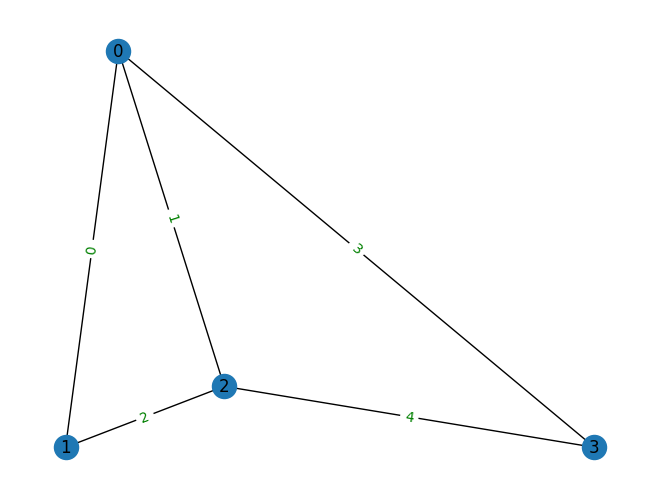

In [19]:
G = nx.Graph()

# Add nodes with custom coordinates
nodes = [(0, {'pos': (0.1, 0.7)}),
         (1, {'pos': (0.05, 0.05)}), 
         (2, {'pos': (0.2, 0.15)}), 
         (3, {'pos': (0.55, 0.05)}),
         ]
G.add_nodes_from(nodes)

edges = [(0, 1), (0, 2), (1, 2), (0, 3), (2, 3)]
# Add an index to each edge in ascending order
indexed_edges = [((start, end), index) for index, (start, end) in enumerate(edges)]
edge_labels = {edge: idx for idx, edge in enumerate(edges)}

# Add edges with index to the graph
for (start, end), index in indexed_edges:
    G.add_edge(start, end, index=index, default_orientation=(start, end))

#G.add_edges_from(edges)
print(f"Number of nodes: {G.number_of_nodes()}")
print(f"Number of edges: {G.number_of_edges()}")
pos = nx.get_node_attributes(G, 'pos')
nx.draw(G, pos, with_labels=True)
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color='green')


In [20]:
from torch_geometric.utils import from_networkx
import torch
from torch_geometric.data import Data
line_graph = nx.line_graph(G)
print("Graph edge index", G.edges)
print("NX Line Grpah edge index", line_graph.edges)
# Convert the NetworkX graph to PyTorch Geometric data
edge_index_list = []
for edge in G.edges:
    edge_neighbors = list(nx.all_neighbors(line_graph, edge))
    for neighbor in edge_neighbors:
        edge_index_list.append([edges.index(edge), edges.index(neighbor)])

# Convert to tensor
edge_index_tensor = torch.tensor(edge_index_list, dtype=torch.long).t().contiguous()

# Create PyTorch Geometric Data object manually
line_graph_data = Data(edge_index=edge_index_tensor)
print("Custom Line Graph edge index", line_graph_data.edge_index)

Graph edge index [(0, 1), (0, 2), (0, 3), (1, 2), (2, 3)]
NX Line Grpah edge index [((0, 2), (1, 2)), ((0, 2), (2, 3)), ((0, 2), (0, 1)), ((0, 2), (0, 3)), ((1, 2), (2, 3)), ((1, 2), (0, 1)), ((2, 3), (0, 3)), ((0, 1), (0, 3))]
Custom Line Graph edge index tensor([[0, 0, 0, 1, 1, 1, 1, 3, 3, 3, 2, 2, 2, 4, 4, 4],
        [2, 1, 3, 2, 4, 0, 3, 4, 1, 0, 1, 4, 0, 2, 1, 3]])


In [21]:
tensor([[1, 1, 1, 1, 0, 0, 0, 2, 2, 2, 3, 3, 3, 4, 4, 4],
        [0, 2, 3, 4, 1, 2, 3, 0, 1, 4, 0, 1, 4, 2, 1, 3]])

NameError: name 'tensor' is not defined

In [22]:
paths, nodes, edges, edge_coordinates = load_new_format('/ceph/hdd/students/schmitj/MA_Diffusion_based_trajectory_prediction/data/tdrive_2.h5')

100%|██████████| 2/2 [00:00<00:00, 475.81it/s]


In [23]:
print(edges[15116])

(7056, 8556)


In [24]:
print(edges[15106])

(7046, 7056)


In [26]:
print(edges[15115])

(7056, 7057)


In [28]:
print(edges[16507])

(8556, 8955)
